In [1]:
# 1) Импорты и настройки
import os, sys, math
sys.path.append(os.path.abspath('..'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import shutil

from src.simulation import simulate_sample
from src.graph_builders import build_knn_graph, build_distance_graph
from src.features import compute_feature
from src.utils import single_run, run_experiment

# Устанавливаем вывод графиков в Jupyter
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# 2) Подготовка директорий для отчёта
base_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "report-alex"))
pics_dir = os.path.abspath(os.path.join(base_dir, "pics"))
csv_dir = os.path.abspath(os.path.join(base_dir, "csv-files"))

# Если папка существует — удаляем её
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

# Создаём заново
os.makedirs(pics_dir)
os.makedirs(csv_dir)

In [3]:
# 3) Определение H0 и H1 (фиксированные для всей части I)
beta0 = math.sqrt(0.5)  # β₀ = sqrt(1/2)
sigma0 = 1.0
dist0 = ("laplace", {"mu": 0, "beta": beta0})
dist1 = ("normal", {"mu": 0, "sigma": sigma0})

# Монте-Карло параметры общего эксперимента
n_sim = 500
alpha = 0.055
seed = 42

In [4]:
# 4) Быстрое исследование диапазона k для k-NN при малом n, чтобы выбрать k и лучший признак
sample_sizes_small = [50]
params_knn = list(range(1, 40))
features_knn = [
    "max_degree",
    "min_degree",
    "num_components",
    "articulation_points",
    "triangle_count",
]

results = {}
for feat in features_knn:
    df = run_experiment(
        dist0,
        dist1,
        sample_sizes=sample_sizes_small,
        params=params_knn,
        feature_name=feat,
        n_sim=200,
        graph_type="knn",
        alpha=alpha,
        seed=seed,
    )
    results[feat] = df

# Рассчитываем максимальную мощность для каждого признака
max_powers = {feat: df["power"].max() for feat, df in results.items()}
best_feat = max(max_powers, key=max_powers.get)
print(f"Best k-NN feature: {best_feat}, max power: {max_powers[best_feat]:.3f}")

# Топ-10 для лучшего признака
df_best_knn = results[best_feat].sort_values("power", ascending=False).head(10)
df_best_knn

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/39 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/39 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/39 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/39 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/39 [00:00<?, ?it/s]

Best k-NN feature: triangle_count, max power: 0.570


,n,param,mean_H0,var_H0,mean_H1,var_H1,threshold,power
24,50,25,2354.275,12229.389375,2572.955,25539.352975,2540.0,0.570
26,50,27,2852.270,8635.597100,3040.195,19418.666975,3011.0,0.525
22,50,23,1919.185,13673.520775,2129.135,23212.786775,2120.0,0.515
25,50,26,2581.945,10325.211975,2782.050,24911.867500,2756.0,0.500
17,50,18,1100.000,9834.410000,1259.920,13348.973600,1257.0,0.495
21,50,22,1737.205,13549.512975,1944.300,25556.510000,1951.0,0.480
13,50,14,654.335,3842.422775,741.275,3848.499375,750.0,0.460
20,50,21,1557.825,11831.354375,1739.725,21622.809375,1754.0,0.455
23,50,24,2129.650,12961.067500,2320.430,27023.215100,2336.0,0.440
18,50,19,1232.275,11448.759375,1412.530,16033.159100,1423.0,0.425


In [5]:
# 5) Быстрое исследование диапазона d для ε-графа при малом n, чтобы выбрать d и лучший признак
sample_sizes_small = [50]
params_dist = list(range(1, 40))
features_dist = [
    "chromatic_number",
    "clique_number",
    "max_independent_set",
    "domination_number",
    "clique_cover_number",
]

results = {}
for feat in features_dist:
    df = run_experiment(
        dist0,
        dist1,
        sample_sizes=sample_sizes_small,
        params=params_dist,
        feature_name=feat,
        n_sim=200,
        graph_type="distance",
        alpha=alpha,
        seed=seed,
    )
    results[feat] = df

# Рассчитываем максимальную мощность для каждого признака
max_powers = {feat: df["power"].max() for feat, df in results.items()}
best_feat = max(max_powers, key=max_powers.get)
print(
    f"Best distance-graph feature: {best_feat}, max power: {max_powers[best_feat]:.3f}"
)

# Топ-10 для лучшего признака
df_best_dist = results[best_feat].sort_values("power", ascending=False).head(10)
df_best_dist

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/39 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/39 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/39 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/39 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/39 [00:00<?, ?it/s]

Best distance-graph feature: chromatic_number, max power: 0.035


,n,param,mean_H0,var_H0,mean_H1,var_H1,threshold,power
2,50,3,45.300,3.540000,44.920,5.013600,48.0,0.035
0,50,1,27.945,7.491975,22.905,8.735975,33.0,0.005
29,50,30,50.000,0.000000,50.000,0.000000,50.0,0.000
22,50,23,50.000,0.000000,50.000,0.000000,50.0,0.000
23,50,24,50.000,0.000000,50.000,0.000000,50.0,0.000
24,50,25,50.000,0.000000,50.000,0.000000,50.0,0.000
25,50,26,50.000,0.000000,50.000,0.000000,50.0,0.000
26,50,27,50.000,0.000000,50.000,0.000000,50.0,0.000
27,50,28,50.000,0.000000,50.000,0.000000,50.0,0.000
28,50,29,50.000,0.000000,50.000,0.000000,50.0,0.000


In [6]:
# 6) Фиксированные параметры после эксплорейшена
fixed_k = 25
knn_feat = "triangle_count"

fixed_d = 3
dist_feat = "chromatic_number"

# Сетка по n для основной части
sample_sizes = [50, 100, 200, 500]

In [7]:
# 7) Исследование зависимости T от параметров H0 (β₀) при k-NN
betas = [0.2, 0.5, 1.0, 2.0]
results_beta = []

for beta in betas:
    dist0_var = ("laplace", {"mu": 0, "beta": beta})
    df = run_experiment(
        dist0_var,
        dist1,
        sample_sizes=[100],
        params=[fixed_k],
        feature_name=knn_feat,
        n_sim=n_sim,
        graph_type="knn",
        alpha=alpha,
        seed=seed,
    )
    row = df.iloc[0]
    results_beta.append(
        {
            "beta": beta,
            "E0": row["mean_H0"],
            "E1": row["mean_H1"],
            "power": row["power"],
        }
    )

df_beta_knn = pd.DataFrame(results_beta)
df_beta_knn

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=100:   0%|          | 0/1 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=100:   0%|          | 0/1 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=100:   0%|          | 0/1 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=100:   0%|          | 0/1 [00:00<?, ?it/s]

,beta,E0,E1,power
0,0.2,4502.552,5194.954,0.734
1,0.5,4502.552,5194.954,0.734
2,1.0,4502.552,5194.954,0.734
3,2.0,4502.552,5194.954,0.734


In [8]:
# 8) Исследование зависимости T от параметров H0 (β₀) при ε-графе
betas = [0.2, 0.5, 1.0, 2.0]
results_beta_dist = []

for beta in betas:
    dist0_var = ("laplace", {"mu": 0, "beta": beta})
    df = run_experiment(
        dist0_var,
        dist1,
        sample_sizes=[100],
        params=[fixed_d],
        feature_name=dist_feat,
        n_sim=n_sim,
        graph_type="distance",
        alpha=alpha,
        seed=seed,
    )
    row = df.iloc[0]
    results_beta_dist.append(
        {
            "beta": beta,
            "E0": row["mean_H0"],
            "E1": row["mean_H1"],
            "power": row["power"],
        }
    )

df_beta_dist = pd.DataFrame(results_beta_dist)
df_beta_dist

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=100:   0%|          | 0/1 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=100:   0%|          | 0/1 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=100:   0%|          | 0/1 [00:00<?, ?it/s]

Sample sizes:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=100:   0%|          | 0/1 [00:00<?, ?it/s]

,beta,E0,E1,power
0,0.2,99.992,88.634,0.00
1,0.5,96.218,88.634,0.00
2,1.0,79.972,88.634,0.76
3,2.0,55.990,88.634,1.00


In [9]:
# 9) Основной эксперимент для k-NN с фиксированным k
df_knn = run_experiment(
    dist0,
    dist1,
    sample_sizes=sample_sizes,
    params=[fixed_k],
    feature_name=knn_feat,
    n_sim=n_sim,
    graph_type="knn",
    alpha=alpha,
    seed=seed,
)
df_knn.to_csv(os.path.join(csv_dir, "results_knn.csv"), index=False)
df_knn

Sample sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=100:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=200:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=500:   0%|          | 0/1 [00:00<?, ?it/s]

,n,param,mean_H0,var_H0,mean_H1,var_H1,threshold,power
0,50,25,2348.102,12151.435596,2556.928,24713.370816,2550.0,0.480
1,100,25,4517.770,96926.341100,5184.996,82312.663984,5057.0,0.678
2,200,25,10252.360,118046.494400,11119.976,123229.227424,10771.0,0.834
3,500,25,28860.138,240426.382956,29633.144,280727.755264,29615.0,0.524


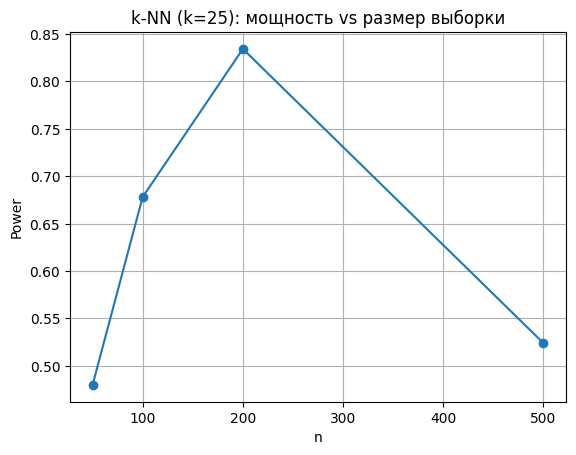

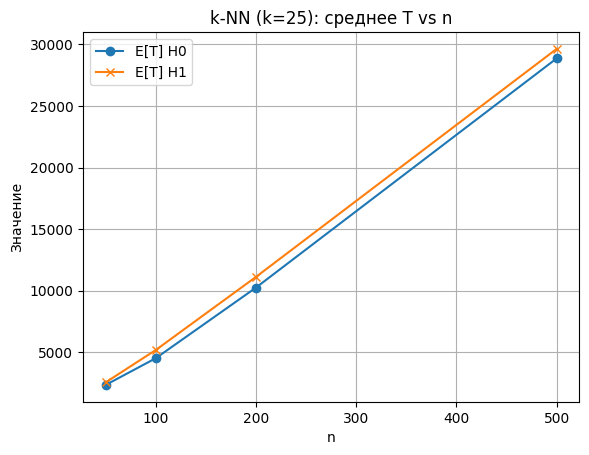

In [10]:
# 10) Графики для k-NN
# Power vs n
plt.figure()
plt.plot(df_knn["n"], df_knn["power"], marker="o")
plt.xlabel("n")
plt.ylabel("Power")
plt.title(f"k-NN (k={fixed_k}): мощность vs размер выборки")
plt.grid(True)
plt.savefig(os.path.join(pics_dir, "knn_power_vs_n.png"), dpi=300)
plt.show()

# E[T] и Var[T] при H0 и H1 vs n
plt.figure()
plt.plot(df_knn["n"], df_knn["mean_H0"], marker="o", label="E[T] H0")
plt.plot(df_knn["n"], df_knn["mean_H1"], marker="x", label="E[T] H1")
plt.xlabel("n")
plt.ylabel("Значение")
plt.title(f"k-NN (k={fixed_k}): среднее T vs n")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(pics_dir, "knn_mean_vs_n.png"), dpi=300)
plt.show()

In [11]:
# 11) Основной эксперимент для ε-графа с фиксированным d
df_dist = run_experiment(
    dist0,
    dist1,
    sample_sizes=sample_sizes,
    params=[fixed_d],
    feature_name=dist_feat,
    n_sim=n_sim,
    graph_type="distance",
    alpha=alpha,
    seed=seed,
)
df_dist.to_csv(os.path.join(csv_dir, "results_dist.csv"), index=False)
df_dist

Sample sizes:   0%|          | 0/4 [00:00<?, ?it/s]

Params for n=50:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=100:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=200:   0%|          | 0/1 [00:00<?, ?it/s]

Params for n=500:   0%|          | 0/1 [00:00<?, ?it/s]

,n,param,mean_H0,var_H0,mean_H1,var_H1,threshold,power
0,50,3,45.232,3.862176,44.878,4.119116,48.0,0.026
1,100,3,90.070,8.381100,88.724,8.803824,94.0,0.022
2,200,3,178.164,17.505104,176.190,19.317900,184.0,0.026
3,500,3,443.270,47.029100,437.298,55.689196,454.0,0.010


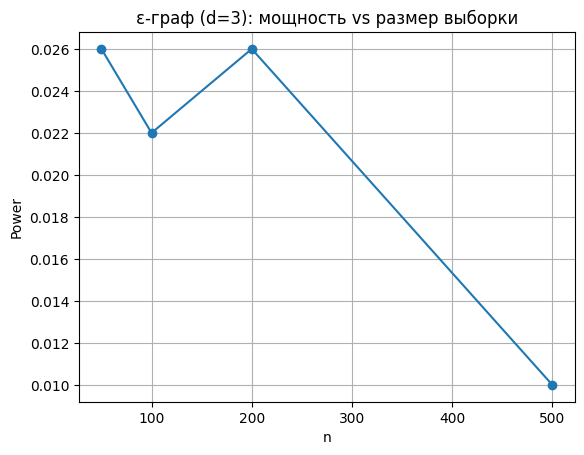

In [12]:
# 12) Графики для ε-графа
plt.figure()
plt.plot(df_dist["n"], df_dist["power"], marker="o")
plt.xlabel("n")
plt.ylabel("Power")
plt.title(f"ε-граф (d={fixed_d}): мощность vs размер выборки")
plt.grid(True)
plt.savefig(os.path.join(pics_dir, "dist_power_vs_n.png"), dpi=300)
plt.show()

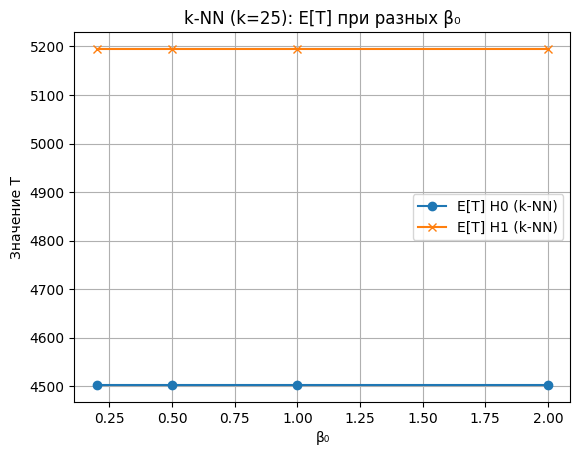

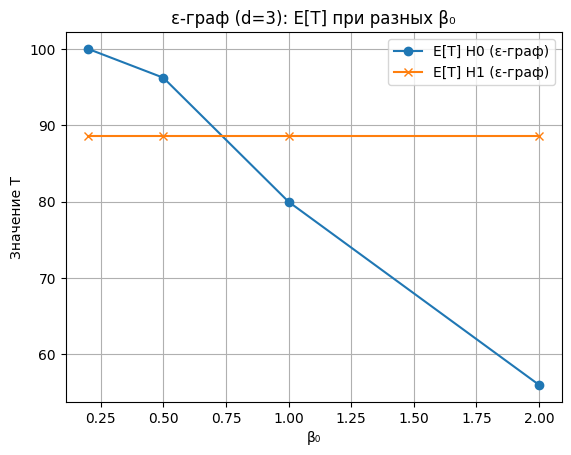

In [13]:
plt.figure()
plt.plot(df_beta_knn["beta"], df_beta_knn["E0"], marker="o", label="E[T] H0 (k-NN)")
plt.plot(df_beta_knn["beta"], df_beta_knn["E1"], marker="x", label="E[T] H1 (k-NN)")
plt.xlabel("β₀")
plt.ylabel("Значение T")
plt.title(f"k-NN (k={fixed_k}): E[T] при разных β₀")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(pics_dir, "knn_mean_vs_beta.png"), dpi=300)
plt.show()

plt.figure()
plt.plot(df_beta_dist["beta"], df_beta_dist["E0"], marker="o", label="E[T] H0 (ε-граф)")
plt.plot(df_beta_dist["beta"], df_beta_dist["E1"], marker="x", label="E[T] H1 (ε-граф)")
plt.xlabel("β₀")
plt.ylabel("Значение T")
plt.title(f"ε-граф (d={fixed_d}): E[T] при разных β₀")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(pics_dir, "dist_mean_vs_beta.png"), dpi=300)
plt.show()